# **Movimiento Browniano con deriva y volatilidad**
# (Browniano motion with drift and volatility)

**Definición:**

Sea $\{B(t), t \geq 0\}$ un movimiento Browniano estándar. El procesos estocástico $\{X(t)= \mu t + \sigma B(t), t \geq 0\}$ recibe el nombre de movimiento Browniano con cieficiente de deriva (drift) $\mu$, y coeficiente de volatilidad (o difusión) $\sigma$.

**Poposición**

La distribucuión de $X(t)$ es normal con media $\mu t$, y varianza $\sigma^2 t$. Y la covarianza entre $X(s)$ y $X(t)$ es $Cov(X(s), X(t)) = \sigma^2 min(s, t)$.

##**Simulación:**

In [3]:
library('dplyr')
library('tidyr')
library('ggplot2')

In [4]:
# Función para generar trajectorias del movimiento Browniano con coeficiente de deriva y volatilidad
simMB.drift <- function(mu, sigma, t, nSteps, nReps){
  dt <- t/ nSteps
  # 
  #nuT <- (mu - sigma^2/2)*dt
  #sigmaT <- sqrt(dt)
  # 
  simMat <- matrix(nrow=nReps, ncol=(nSteps+1))
  simMat[ ,1] <- 0
  for(i in 1:nReps){
    for(j in 2:(nSteps + 1)){
      simMat[i,j] <- mu*dt + simMat[i,j-1] + sigma*sqrt(dt)*rnorm(1,0,1)
    }
  }
  names <- c('Rep', sapply(0:nSteps, function(i) paste('S',i,sep='')))
  df <- data.frame('Rep'=1:nReps, simMat)
  colnames(df) <- names

  return(df)
}

## **Ejemplo 1:**

In [5]:
# Ejemplo
t <- 1
mu <- 0.3
sigma <- 0.06
nSteps <- 1000
nReps <- 1

bm1 <- simMB.drift(mu, sigma, t, nSteps, nReps)
#print(bm1)

In [10]:
df <- bm1 %>% 
  pivot_longer(!Rep, names_to='Step', values_to='value') %>%
  mutate(t = as.numeric(substring(Step,2,10))*t/nSteps,
         Rep = as.character(Rep))
head(df)

# Media y varianza teóricas
moments <- data.frame('t'=seq(from=0, to=1, length=nSteps+1)*t) %>%
  mutate('mean' = mu*t,
          'sd_inf' = mean - 2*sqrt(sigma^2*t),
          'sd_sup' = mean + 2*sqrt(sigma^2*t)) 

Rep,Step,value,t
<chr>,<chr>,<dbl>,<dbl>
1,S0,0.000000e+00,0.000
1,S1,-5.389599e-05,0.001
1,S2,-1.904320e-03,0.002
1,S3,-2.609824e-03,0.003
1,S4,-2.826873e-05,0.004
1,S5,-4.367183e-04,0.005


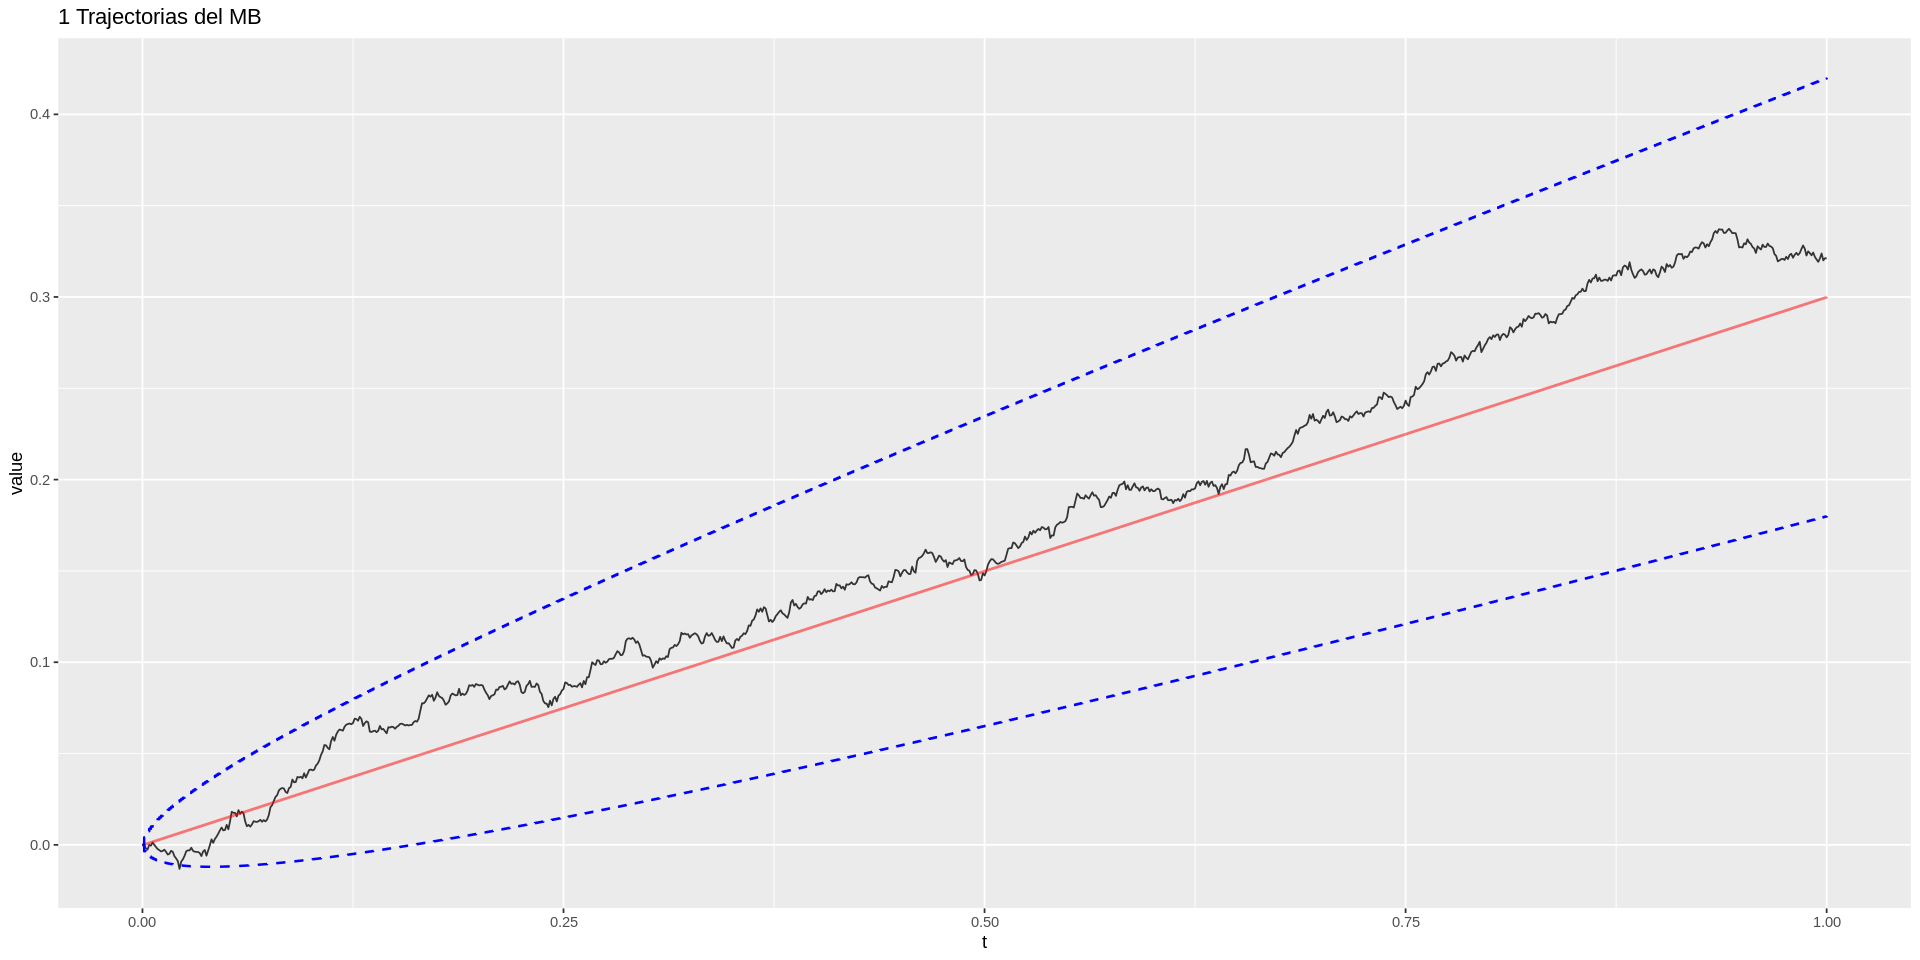

In [11]:
# Gráfico del Movimiento Browniano con coeficiente de deriva y volatilidad
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df, mapping=aes(x=t, y=value, color=Rep)) + 
  geom_line() + 
  geom_step(moments, mapping=aes(x=t,y=mean),col='red',size=0.7, alpha=0.5) +
  geom_step(moments, mapping=aes(x=t,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  geom_step(moments, mapping=aes(x=t,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  labs( title = paste(nReps, "Trajectorias del MB")) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) 
  #coord_cartesian(xlim = c(0, tmax))
p1

**Ejemplo 2:**

In [12]:
# Ejemplo 2
t <- 1
mu <- 0.3
sigma <- 0.06
nSteps <- 1000
nReps <- 1000

bm1 <- simMB.drift(mu, sigma, t, nSteps, nReps)
#print(bm1)

In [13]:
df <- bm1 %>% 
  pivot_longer(!Rep, names_to='Step', values_to='value') %>%
  mutate(t = as.numeric(substring(Step,2,10))*t/nSteps,
         Rep = as.character(Rep))
head(df)

# Media y varianza teóricas
moments <- data.frame('t'=seq(from=0, to=1, length=nSteps+1)*t) %>%
  mutate('mean' = mu*t,
          'sd_inf' = mean - 2*sqrt(sigma^2*t),
          'sd_sup' = mean + 2*sqrt(sigma^2*t)) 

Rep,Step,value,t
<chr>,<chr>,<dbl>,<dbl>
1,S0,0.000000000,0.000
1,S1,0.002773597,0.001
1,S2,0.003177185,0.002
1,S3,0.003585828,0.003
1,S4,0.002133353,0.004
1,S5,0.001750109,0.005


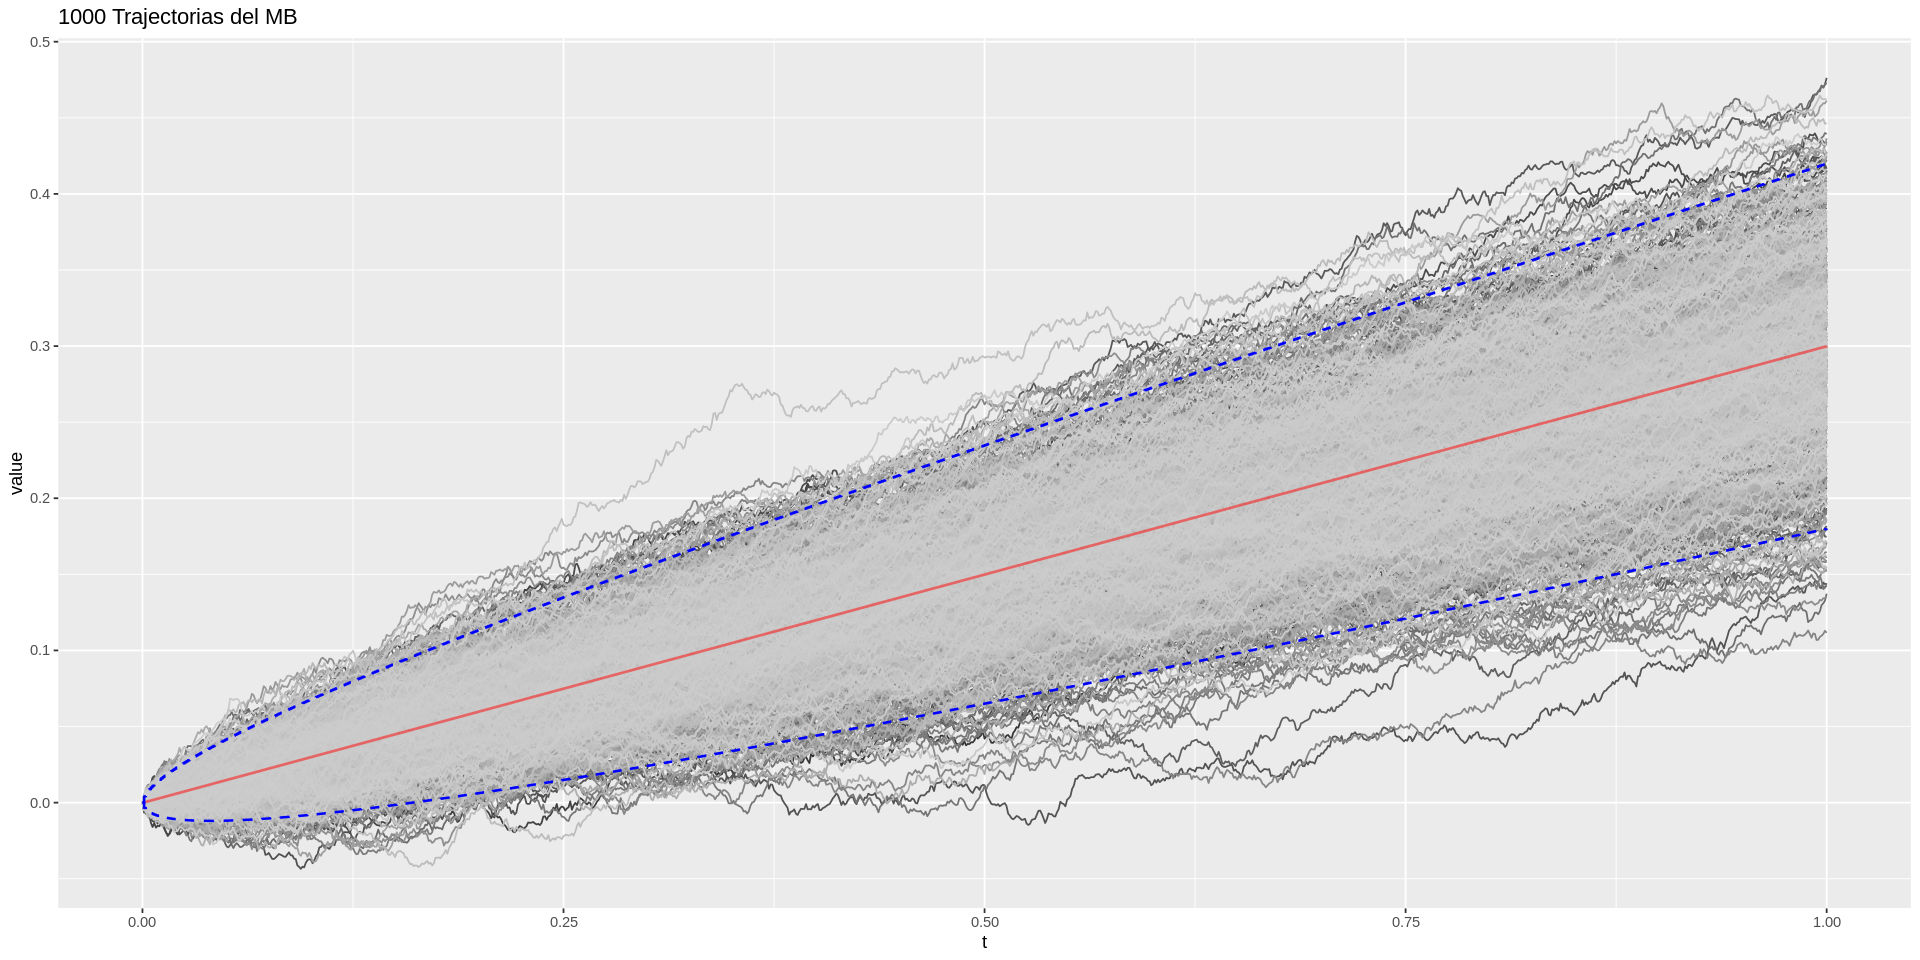

In [14]:
# Gráfico del Movimiento Browniano con coeficiente de deriva y volatilidad
options(repr.plot.width=16, repr.plot.height=8)
p1 <- ggplot(df, mapping=aes(x=t, y=value, color=Rep)) + 
  geom_line() + 
  geom_step(moments, mapping=aes(x=t,y=mean),col='red',size=0.7, alpha=0.5) +
  geom_step(moments, mapping=aes(x=t,y=sd_sup),col='blue',size=0.7,linetype = "dashed") +
  geom_step(moments, mapping=aes(x=t,y=sd_inf),col='blue',size=0.7,linetype = "dashed") +
  labs( title = paste(nReps, "Trajectorias del MB")) +
  theme(legend.position = "none") +
  scale_colour_grey(start = 0.2,end = 0.8) 
  #coord_cartesian(xlim = c(0, tmax))
p1

## Movimiento Browniano con coeficiente deriva y volatilidad en dos dimensiones.

In [28]:
#  Movimiento Browniano en dos dimensiones
plot.MB2d_drift <- function(base, n.steps){
  
  df <- base
  df_2d <- df  %>%
    gather(key='t',value='valor',-Rep) %>%
    filter(Rep == 1 | Rep== 2) %>%
    spread(Rep, valor)  %>%
    rename(Rep1 = '1', Rep2='2')%>%
    mutate(t = as.numeric(substring(t,2,10))) %>%
    arrange(t) %>%
    filter(t <= n.steps)
  b2 <- ggplot(df_2d,aes(x=Rep1,y=Rep2))+
    geom_point(color="blue") +
    geom_point(df_2d%>%filter(t == 0),mapping=aes(x=Rep1,y=Rep2), size=4, color="green") +
    geom_point(df_2d%>%filter(t == max(t)),mapping=aes(x=Rep1,y=Rep2), size=3, color="red") +
    geom_path() +
    theme(axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks.x=element_blank(),
          axis.ticks.y=element_blank()
          )
  return(b2)
}

In [42]:
# Ejemplo 1:
t <- 1
mu <- 0.1
sigma <- 0.06
nSteps <- 10000
nReps <- 10

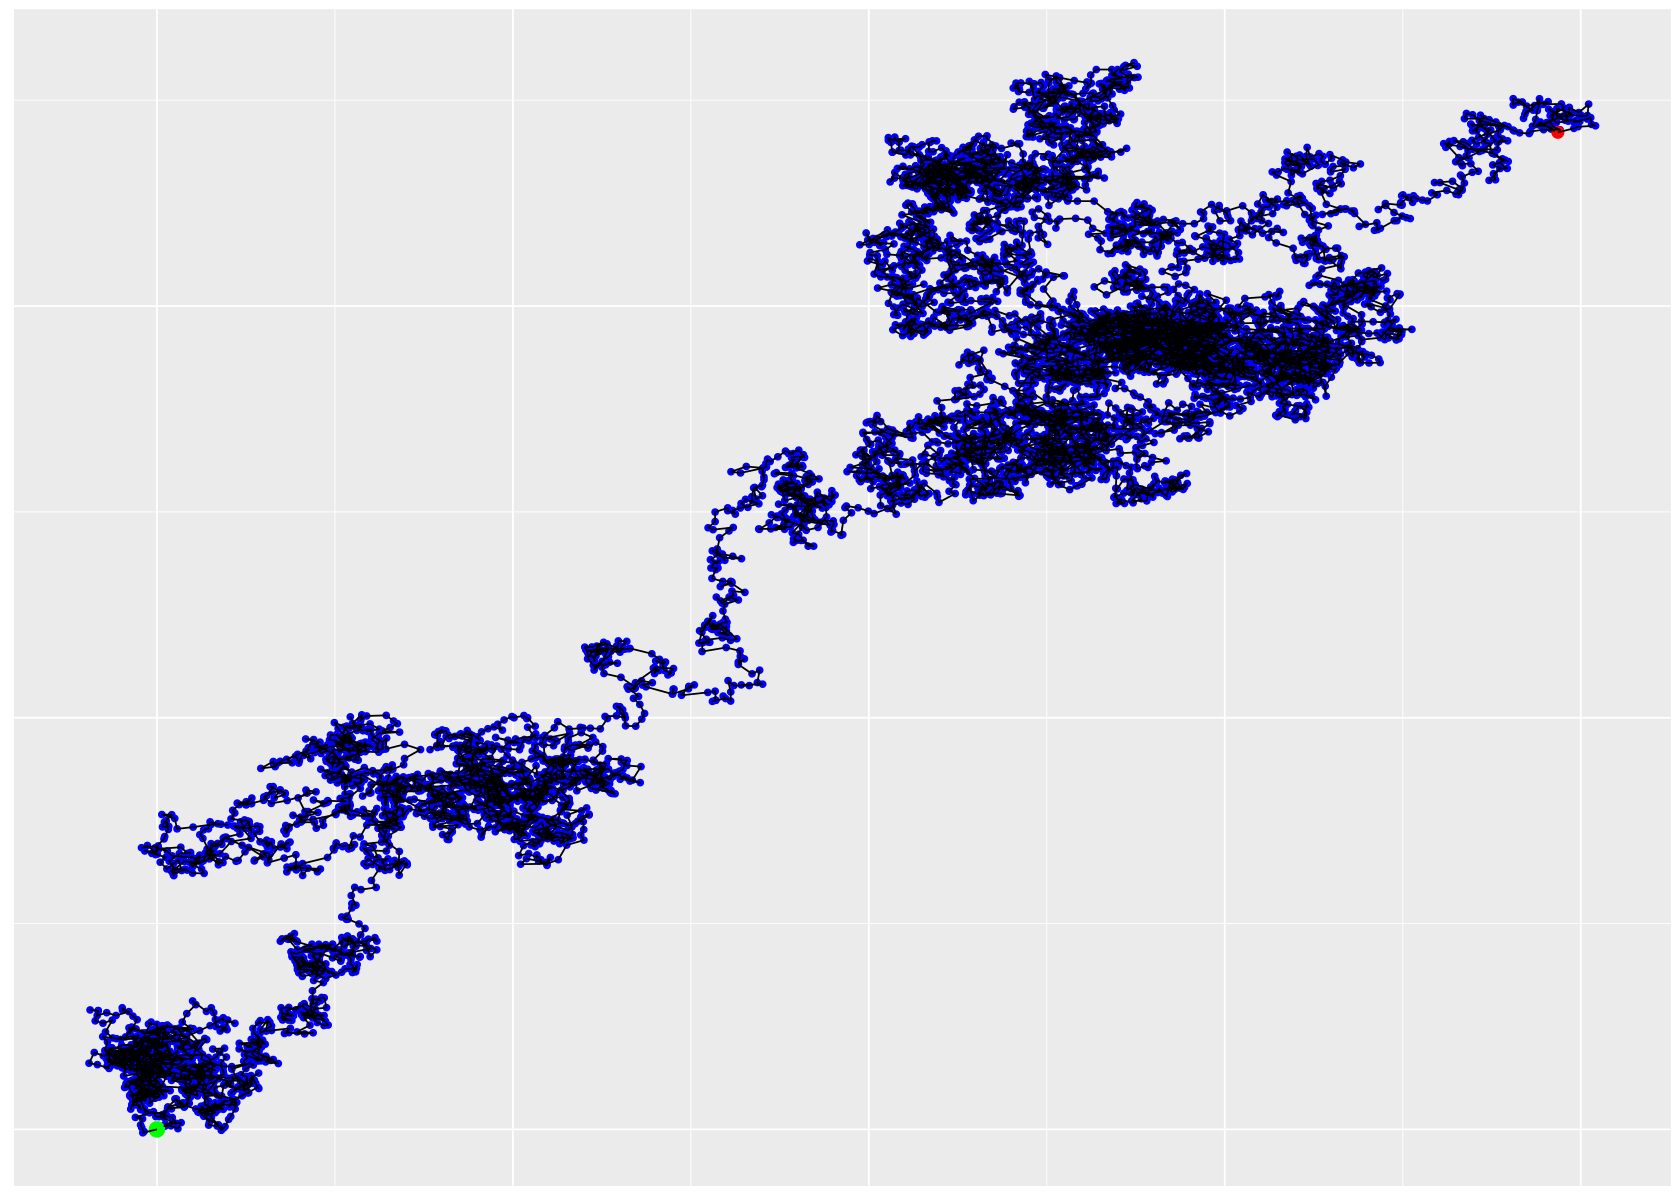

In [43]:
# Plot
options(repr.plot.width=14, repr.plot.height=10)
df <- simMB.drift(mu, sigma, t, nSteps, nReps)
p3 <- plot.MB2d_drift(df, nSteps)
p3 